## Grupowanie hierarchiczne

Z użyciem biblioteki sklearn

### Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.2)

### Wygenerowanie danych

In [2]:
from sklearn.datasets import make_blobs

# 10 punktów, dwa skupiska
data = make_blobs(n_samples=10, centers=2, cluster_std=1.0, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

x1        x2
0  1.986985  1.016248
1 -2.470776  6.745699
2 -0.428145  7.978864
3  2.699072  1.892783
4 -2.241511  6.977292

### Wizualizacja danych

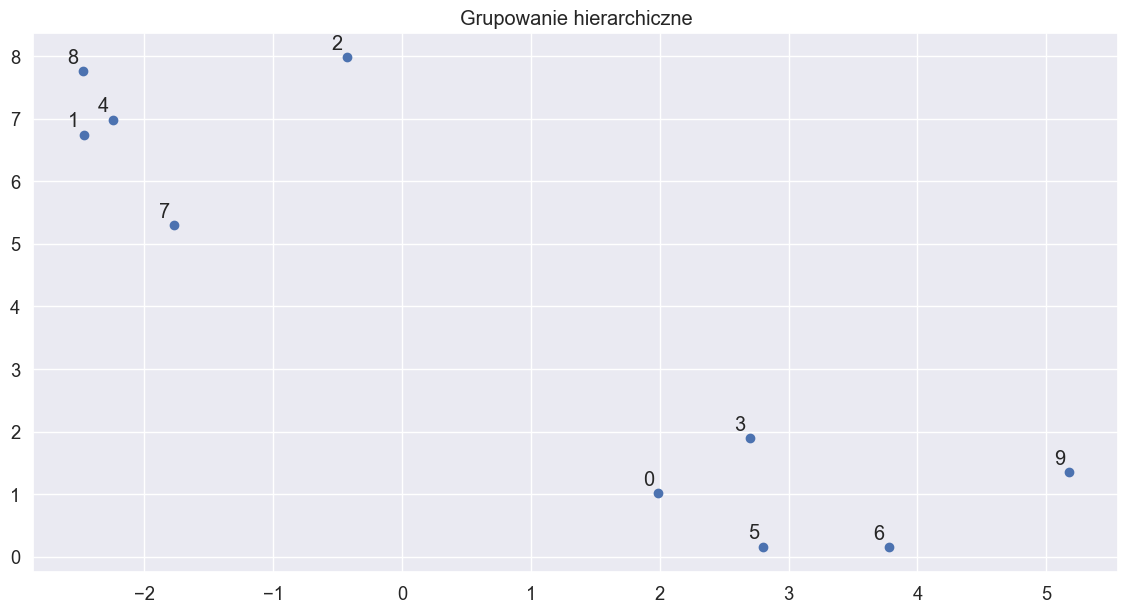

In [3]:
plt.figure(figsize=(14, 7))
plt.scatter(data[:,0], data[:,1])

for label, x, y in zip(range(10), data[:, 0], data[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.title('Grupowanie hierarchiczne')
plt.show()

### Grupowanie

In [4]:
from sklearn.cluster import AgglomerativeClustering  # ta klasa algorytm ma już zaimplementowany

cluster = AgglomerativeClustering(n_clusters=2)  # 2 klastry, inne parametry - metric i linkage
y_hca = cluster.fit_predict(data)  # dopasowujemy dane metodą fit predict
# w wyniku mamy numer klastra
print(y_hca)

[0 1 1 0 1 0 0 1 1 0]


### Wizualizacja

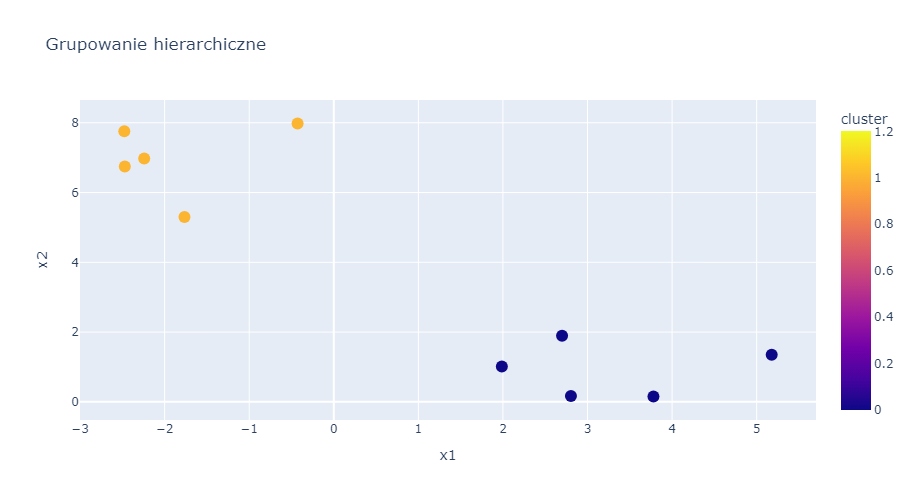

In [5]:
df = pd.DataFrame(data, columns=['x1', 'x2'])
df['cluster'] = cluster.labels_

fig = px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500,
                 title='Grupowanie hierarchiczne', color_continuous_midpoint=0.6)
fig.update_traces(marker_size=12)
fig.show()

### Popatrzmy na różne metryki

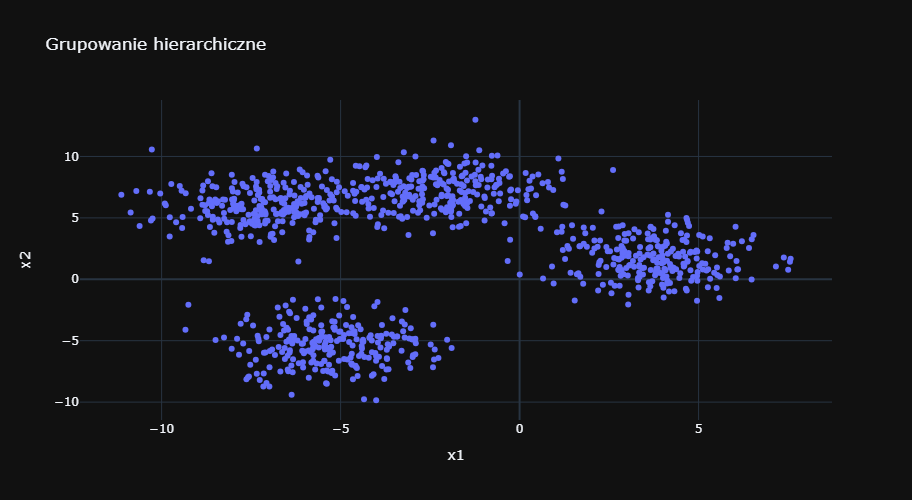

In [6]:
# generujemy dane (1000 próbek)
data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=950, height=500, title='Grupowanie hierarchiczne', template='plotly_dark')

#### Euklidesowa

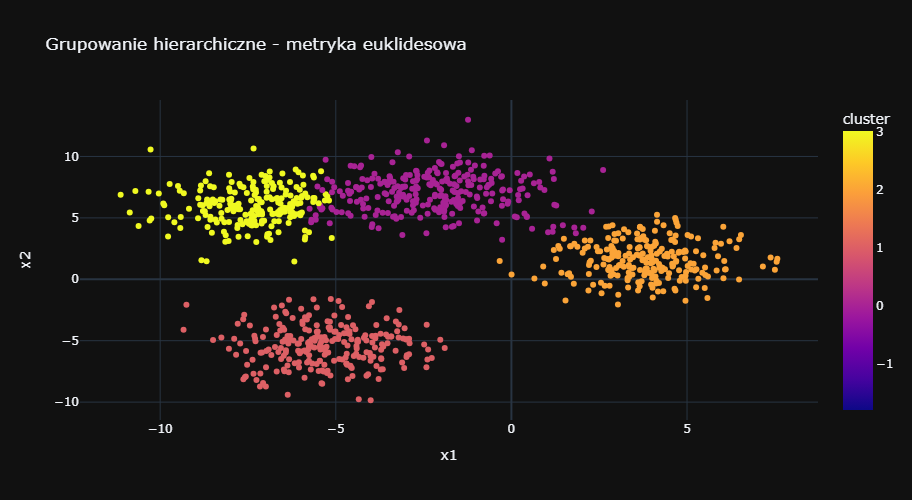

In [7]:
cluster_euclidean = AgglomerativeClustering(n_clusters=4) # model grupowania hierarchiczne w oparciu o metrykę euklidesową
cluster_euclidean.fit_predict(data)  

# wizualizacja
df_euclidean = pd.DataFrame(data, columns=['x1', 'x2'])
df_euclidean['cluster'] = cluster_euclidean.labels_
fig = px.scatter(df_euclidean, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne - metryka euklidesowa', color_continuous_midpoint=0.6)
fig.show()

#### Manhattan

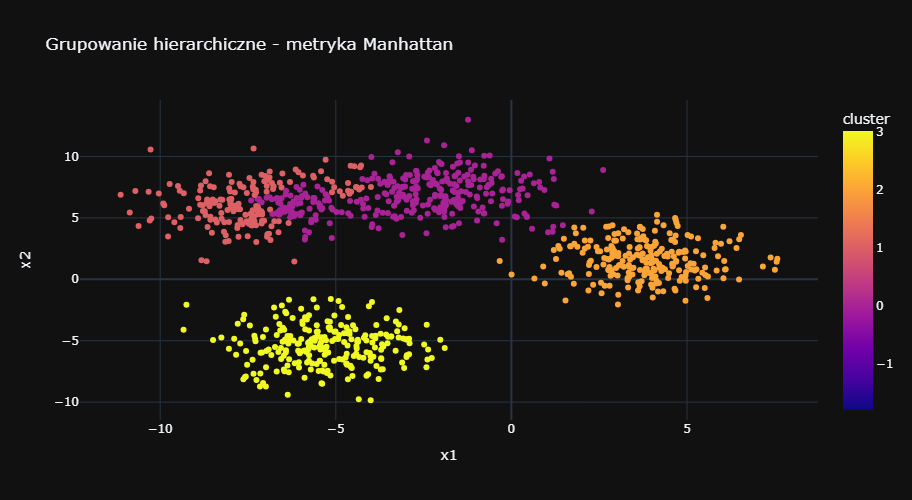

In [8]:
cluster_manhattan = AgglomerativeClustering(n_clusters=4, metric='manhattan', linkage='complete') 
# linkage musi mieć wartość inną niż domyślna która była przypisana w przypadku metryki euklidesowej

cluster_manhattan.fit_predict(data)

cluster_manhattan = AgglomerativeClustering(n_clusters=4, metric='manhattan', linkage='complete')  # linkage - parametr musi mieć wartość inną niż domyślna 
# która była przypisana w przypadku metryki euklidesowej
cluster_manhattan.fit_predict(data)

# wizualizacja
df_manhattan = pd.DataFrame(data, columns=['x1', 'x2'])
df_manhattan['cluster'] = cluster_manhattan.labels_
fig = px.scatter(df_manhattan, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne - metryka Manhattan', color_continuous_midpoint=0.6)
fig.show()

#### Consinus

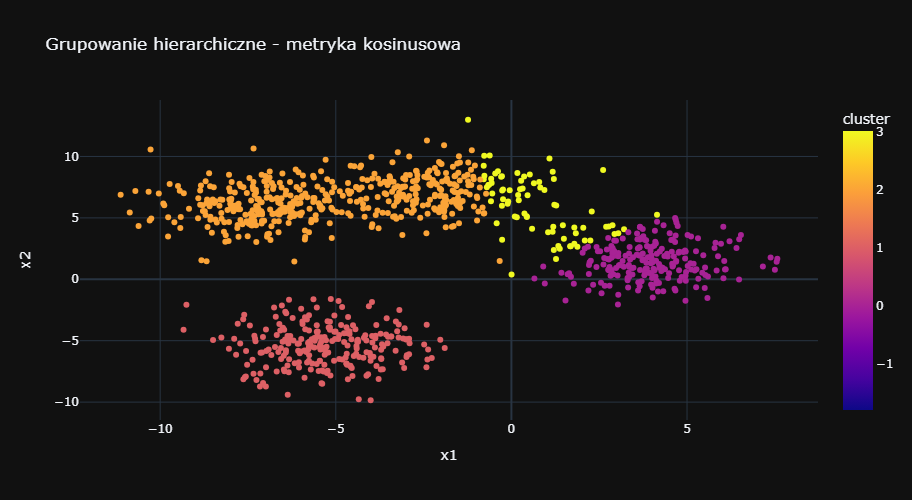

In [9]:
cluster_cosine = AgglomerativeClustering(n_clusters=4, metric='cosine', linkage='complete')
cluster_cosine.fit_predict(data)

df_cosine = pd.DataFrame(data, columns=['x1', 'x2'])
df_cosine['cluster'] = cluster_cosine.labels_
fig = px.scatter(df_cosine, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne - metryka kosinusowa', color_continuous_midpoint=0.6)
fig.show()

#### Zestawienie

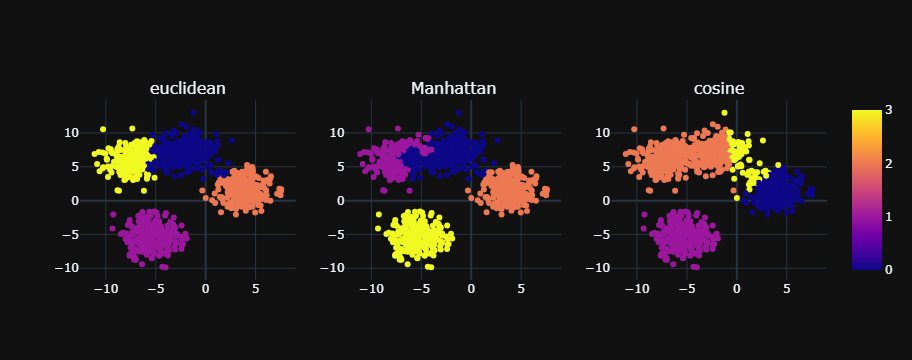

In [10]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, column_titles=['euclidean', 'Manhattan', 'cosine'])

fig1 = px.scatter(df_euclidean, 'x1', 'x2', 'cluster')['data'][0]
fig2 = px.scatter(df_manhattan, 'x1', 'x2', 'cluster')['data'][0]   
fig3 = px.scatter(df_cosine, 'x1', 'x2', 'cluster')['data'][0]                         

fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)
fig.add_trace(fig3, row=1, col=3)
fig.update_layout(template='plotly_dark')
fig.show()